## Import Functions

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## Pre-Processing

In [3]:
dataset_train_total = pd.read_csv("/Users/maharshichattopadhyay/Documents/Study/Major_Project/DataSet/Final_Dataset/MCB_Train.csv")
dataset_test_total = pd.read_csv("/Users/maharshichattopadhyay/Documents/Study/Major_Project/DataSet/Final_Dataset/MCB_Test.csv") 
dataset_train=pd.DataFrame(columns=['Date','Open','Low','High','Close','Volume'])
dataset_test=pd.DataFrame(columns=['Date','Open','Low','High','Close','Volume'])
dataset_train['Date']=dataset_train_total['Date']
dataset_train['Open']=dataset_train_total['Open']
dataset_train['Low']=dataset_train_total['Low']
dataset_train['High']=dataset_train_total['High']
dataset_train['Close']=dataset_train_total['Close']
dataset_train['Volume']=dataset_train_total['Volume']
dataset_test['Date']=dataset_test_total['Date']
dataset_test['Open']=dataset_test_total['Open']
dataset_test['Low']=dataset_test_total['Low']
dataset_test['High']=dataset_test_total['High']
dataset_test['Close']=dataset_test_total['Close']
dataset_test['Volume']=dataset_test_total['Volume']

In [4]:
dataset_train.head()

,Date,Open,Low,High,Close,Volume
0,3-Jan-11,226.00,221.50,227.00,223.32,646442.0
1,4-Jan-11,223.32,223.32,229.50,227.97,1601540.0
2,5-Jan-11,227.00,225.60,232.00,226.27,2181684.0
3,6-Jan-11,227.00,224.20,227.65,226.16,1034935.0
4,7-Jan-11,227.50,223.80,227.99,225.99,1247251.0


In [5]:
#dataset_test.head()

In [6]:
trainset = dataset_train.iloc[:,4:5].values
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
trainset

array([[223.32],
       [227.97],
       [226.27],
       ...,
       [   nan],
       [   nan],
       [   nan]])

In [7]:
x_train = []
y_train = []

In [8]:
for i in range(60,1476):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
#x_train.shape

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1416, 60, 1)

In [11]:
#type(training_scaled)

## LSTM-RNN Model

In [21]:
model = Sequential()
model.add(LSTM(units = 25,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units = 25,return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 25,return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 25))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')#,metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size = 12, validation_split=0.20, verbose=1)

Train on 1132 samples, validate on 284 samples
Epoch 1/10
 284/1132 [======>.......................] - ETA: 1:27 - loss: 0.0264

KeyboardInterrupt: 

## Predictions

In [15]:
testset = dataset_test.iloc[:,4:5].values
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total.head()

0    226.00
1    223.32
2    227.00
3    227.00
4    227.50
Name: Open, dtype: float64

In [16]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
#inputs
inputs = inputs.reshape(-1,1)
#inputs

In [17]:
inputs = sc.transform(inputs)
inputs.shape

(431, 1)

In [18]:
x_test = []
for i in range(60,367):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
#x_test.shape
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(307, 60, 1)

In [19]:
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

## Plot

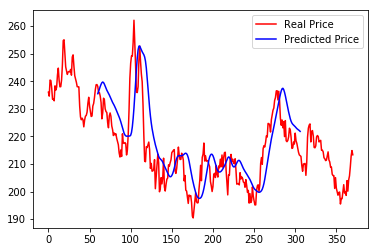

In [20]:
plt.plot(testset,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.legend()
plt.show()